<center><h1>Line Drawing using Digital Differential Analyzer (DDA) algorithm</h1></center>

Enter starting x:  -2
Enter starting y:  3
Enter ending x:  8
Enter ending y:  10


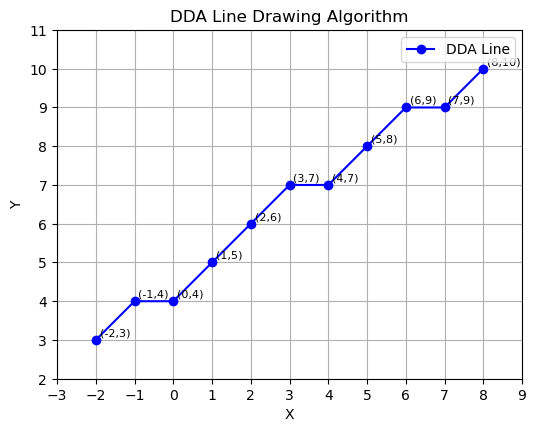

In [11]:
import matplotlib.pyplot as plt

def dda(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    steps = max(abs(dx), abs(dy))

    x_increment = dx / steps
    y_increment = dy / steps

    x, y = x0, y0
    points = []

    for _ in range(int(steps) + 1):
        points.append((round(x), round(y)))
        x += x_increment
        y += y_increment

    return points


x_start = float(input("Enter starting x: "))
y_start = float(input("Enter starting y: "))
x_end = float(input("Enter ending x: "))
y_end = float(input("Enter ending y: "))

points = dda(x_start, y_start, x_end, y_end)

# Extract x and y coordinates
x_vals = [pt[0] for pt in points]
y_vals = [pt[1] for pt in points]

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, 'bo-', label='DDA Line')
plt.grid(True)
plt.title('DDA Line Drawing Algorithm')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(range(int(min(x_vals) - 1), int(max(x_vals) + 2)))
plt.yticks(range(int(min(y_vals) - 1), int(max(y_vals) + 2)))
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Annotate each point
for (x, y) in points:
    plt.text(x + 0.1, y + 0.1, f'({x},{y})', fontsize=8)

plt.show()

<center><h1>Line Drawing using Bresenham’s Line Algorithm</h1></center>

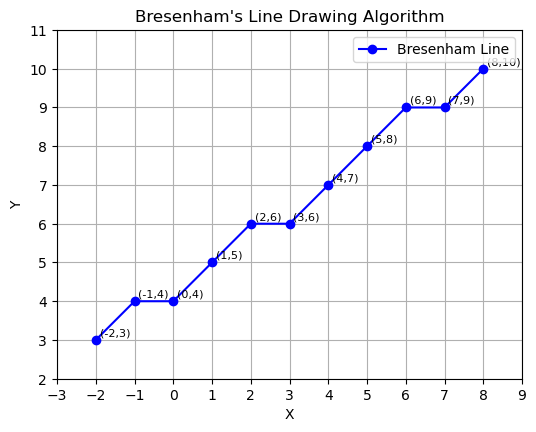

In [38]:
import matplotlib.pyplot as plt

def bresenham(x0, y0, x1, y1):
    
    points = []

    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0

    sx = 1 if x1 > x0 else -1
    sy = 1 if y1 > y0 else -1

    if dx > dy:
        err = dx // 2
        while x != x1:
            points.append((x, y))
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy // 2
        while y != y1:
            points.append((x, y))
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy

    points.append((x1, y1))
    return points

# ✅ User Input
x_start = int(input("Enter starting x: "))
y_start = int(input("Enter starting y: "))
x_end = int(input("Enter ending x: "))
y_end = int(input("Enter ending y: "))

points = bresenham(x_start, y_start, x_end, y_end)

# Extract x and y for plotting
x_vals = [pt[0] for pt in points]
y_vals = [pt[1] for pt in points]

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, 'bo-', label="Bresenham Line")
plt.grid(True)
plt.title("Bresenham's Line Drawing Algorithm")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(range(min(x_vals)-1, max(x_vals)+2))
plt.yticks(range(min(y_vals)-1, max(y_vals)+2))
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

# Annotate each plotted point
for (x, y) in points:
    plt.text(x + 0.1, y + 0.1, f'({x},{y})', fontsize=8)

plt.show()

<center><h1>Mid-point Circle Drawing algorithm</h1></center>

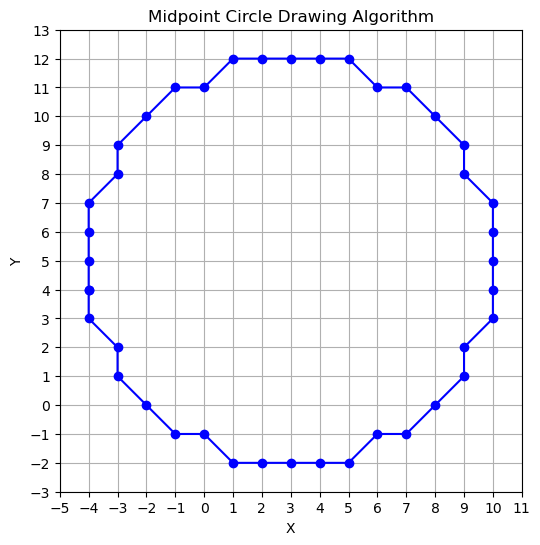

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def midpoint_circle(cx, cy, r):
    """Midpoint Circle Drawing Algorithm"""
    x = 0
    y = r
    d = 1 - r
    points = []

    def plot_circle_points(cx, cy, x, y):
        return [
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y),
            (cx + y, cy + x), (cx - y, cy + x),
            (cx + y, cy - x), (cx - y, cy - x),
        ]

    while x <= y:
        points.extend(plot_circle_points(cx, cy, x, y))
        x += 1
        if d < 0:
            d += 2 * x + 1
        else:
            y -= 1
            d += 2 * (x - y) + 1

    # Remove duplicates and sort for smoother plotting
    unique_points = sorted(set(points), key=lambda p: np.arctan2(p[1] - cy, p[0] - cx))
    return unique_points

# ✅ Get user input
cx = int(input("Enter circle center x (cx): "))
cy = int(input("Enter circle center y (cy): "))
radius = int(input("Enter radius: "))

# Get circle points
circle_points = midpoint_circle(cx, cy, radius)
x_vals, y_vals = zip(*circle_points)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), color='blue', marker='o')
plt.title("Midpoint Circle Drawing Algorithm")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(range(min(x_vals) - 1, max(x_vals) + 2))
plt.yticks(range(min(y_vals) - 1, max(y_vals) + 2))
plt.show()


<center><h1>Bresenham Circle Drawing algorithm</h1></center>

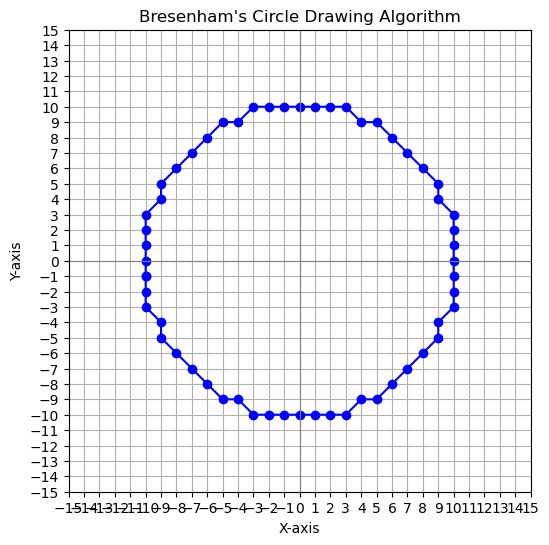

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def bresenham_circle(cx, cy, r):
    """Bresenham's Circle Drawing Algorithm (Midpoint Circle Variant)"""
    x = 0
    y = r
    d = 3 - 2 * r
    points = []

    def plot_circle_points(cx, cy, x, y):
        return [
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y),
            (cx + y, cy + x), (cx - y, cy + x),
            (cx + y, cy - x), (cx - y, cy - x)
        ]

    while x <= y:
        points.extend(plot_circle_points(cx, cy, x, y))
        if d < 0:
            d += 4 * x + 6
        else:
            d += 4 * (x - y) + 10
            y -= 1
        x += 1

    # Remove duplicates and sort for smooth plotting
    unique_points = sorted(set(points), key=lambda p: np.arctan2(p[1] - cy, p[0] - cx))
    return unique_points

# ✅ User input
cx = int(input("Enter circle center x (cx): "))
cy = int(input("Enter circle center y (cy): "))
radius = int(input("Enter radius: "))
padding = 5  # padding around circle in the plot

# Generate circle points
circle_points = bresenham_circle(cx, cy, radius)
x_vals, y_vals = zip(*circle_points)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_vals + (x_vals[0],), y_vals + (y_vals[0],), color='blue', marker='o')
plt.title("Bresenham's Circle Drawing Algorithm")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Draw X and Y axes through origin
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Adjust visible range based on input
plt.xlim(cx - radius - padding, cx + radius + padding)
plt.ylim(cy - radius - padding, cy + radius + padding)
plt.xticks(range(cx - radius - padding, cx + radius + padding + 1))
plt.yticks(range(cy - radius - padding, cy + radius + padding + 1))

plt.show()


<center><h1>Midpoint ellipse drawing algorithm</h1></center>

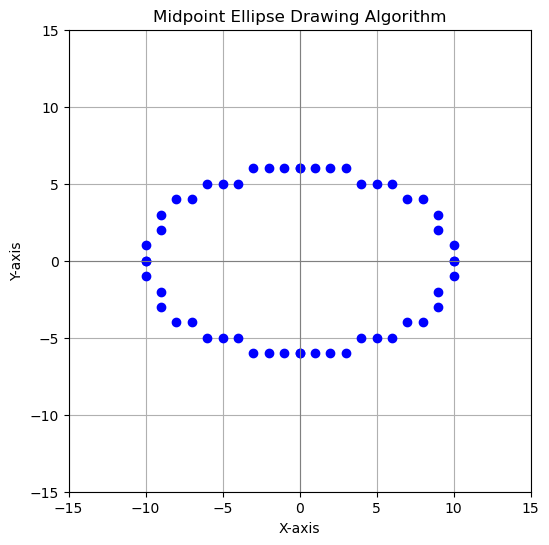

In [45]:
import matplotlib.pyplot as plt

def midpoint_ellipse(cx, cy, rx, ry):
    points = []

    x = 0
    y = ry

    # Initial decision parameter of region 1
    ry2 = ry * ry
    rx2 = rx * rx
    d1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    dx = 2 * ry2 * x
    dy = 2 * rx2 * y

    # Region 1
    while dx < dy:
        # 4-way symmetry
        points.extend([
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y)
        ])
        if d1 < 0:
            x += 1
            dx = dx + (2 * ry2)
            d1 = d1 + dx + ry2
        else:
            x += 1
            y -= 1
            dx = dx + (2 * ry2)
            dy = dy - (2 * rx2)
            d1 = d1 + dx - dy + ry2

    # Region 2
    d2 = (ry2) * ((x + 0.5) ** 2) + (rx2) * ((y - 1) ** 2) - (rx2 * ry2)

    while y >= 0:
        points.extend([
            (cx + x, cy + y), (cx - x, cy + y),
            (cx + x, cy - y), (cx - x, cy - y)
        ])
        if d2 > 0:
            y -= 1
            dy = dy - (2 * rx2)
            d2 = d2 + rx2 - dy
        else:
            y -= 1
            x += 1
            dx = dx + (2 * ry2)
            dy = dy - (2 * rx2)
            d2 = d2 + dx - dy + rx2

    return points

# ✅ User input
cx = int(input("Enter center x (cx): "))
cy = int(input("Enter center y (cy): "))
rx = int(input("Enter horizontal radius (rx): "))
ry = int(input("Enter vertical radius (ry): "))

# Generate ellipse points
points = midpoint_ellipse(cx, cy, rx, ry)
x_vals, y_vals = zip(*points)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, 'bo')  # plotted as discrete blue points
plt.title("Midpoint Ellipse Drawing Algorithm")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Draw X and Y axes through origin
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Auto-scale axes
padding = max(rx, ry) + 5
plt.xlim(cx - padding, cx + padding)
plt.ylim(cy - padding, cy + padding)
plt.show()


<center><h1>Window and Viewport</h1></center>

The point (30, 80) in the window transforms to (35.0, 60.0) in the viewport.


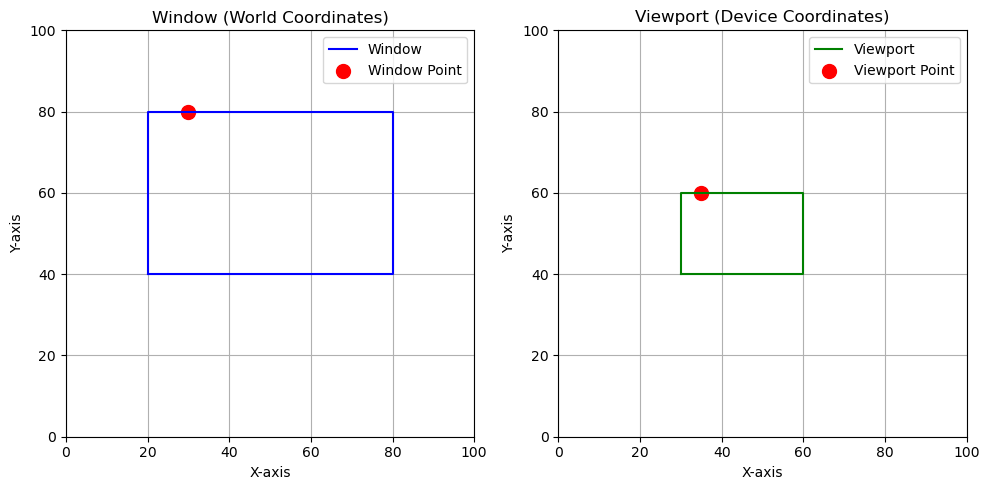

In [22]:
import matplotlib.pyplot as plt

def window_to_viewport(xw, yw, xw_min, xw_max, yw_min, yw_max, xv_min, xv_max, yv_min, yv_max):
    """
    Performs a window to viewport transformation for a given point.

    Args:
        xw (float): X-coordinate of the point in the window.
        yw (float): Y-coordinate of the point in the window.
        xw_min (float): Minimum X-coordinate of the window.
        xw_max (float): Maximum X-coordinate of the window.
        yw_min (float): Minimum Y-coordinate of the window.
        yw_max (float): Maximum Y-coordinate of the window.
        xv_min (float): Minimum X-coordinate of the viewport.
        xv_max (float): Maximum X-coordinate of the viewport.
        yv_min (float): Minimum Y-coordinate of the viewport.
        yv_max (float): Maximum Y-coordinate of the viewport.

    Returns:
        tuple: A tuple containing the X and Y coordinates of the transformed point in the viewport (xv, yv).
    """

    # Calculate scaling factors
    sx = (xv_max - xv_min) / (xw_max - xw_min) 
    sy = (yv_max - yv_min) / (yw_max - yw_min)

    # Calculate transformed coordinates in the viewport
    xv = xv_min + (xw - xw_min) * sx
    yv = yv_min + (yw - yw_min) * sy

    return xv, yv


if __name__ == "__main__":
    # Define window coordinates
    xw_min = 20
    xw_max = 80
    yw_min = 40
    yw_max = 80

    # Define viewport coordinates
    xv_min = 30
    xv_max = 60
    yv_min = 40
    yv_max = 60

    # Define a point within the window
    xw_point = 30
    yw_point = 80

    # Perform the transformation
    xv_point, yv_point = window_to_viewport(
        xw_point,
        yw_point,
        xw_min,
        xw_max,
        yw_min,
        yw_max,
        xv_min,
        xv_max,
        yv_min,
        yv_max,
    )

    print(f"The point ({xw_point}, {yw_point}) in the window transforms to ({xv_point}, {yv_point}) in the viewport.")

    # Matplotlib Visualization
    plt.figure(figsize=(10, 5)) # Set the figure size to ensure a good aspect ratio

    # Plot the window
    plt.subplot(1, 2, 1) # Create subplots for better comparison
    plt.plot([xw_min, xw_max, xw_max, xw_min, xw_min], [yw_min, yw_min, yw_max, yw_max, yw_min], 'b-', label='Window') 
    plt.scatter([xw_point], [yw_point], color='red', marker='o', s=100, label='Window Point') # Use `scatter` to visualize the point as a red circle.
    plt.title('Window (World Coordinates)') # Add a title to the subplot.
    plt.xlabel('X-axis') # Label the x-axis.
    plt.ylabel('Y-axis') # Label the y-axis.
    plt.xlim(0, 100) # Set x-axis limits to clearly show the window.
    plt.ylim(0, 100) # Set y-axis limits.
    plt.grid(True) # Add a grid for better readability.
    plt.legend() # Display the legend to identify the window and point.

    # Plot the viewport
    plt.subplot(1, 2, 2) # Create subplots for better comparison
    plt.plot([xv_min, xv_max, xv_max, xv_min, xv_min], [yv_min, yv_min, yv_max, yv_max, yv_min], 'g-', label='Viewport')
    plt.scatter([xv_point], [yv_point], color='red', marker='o', s=100, label='Viewport Point') # Use `scatter` to visualize the transformed point as a red circle.
    plt.title('Viewport (Device Coordinates)') # Add a title to the subplot.
    plt.xlabel('X-axis') # Label the x-axis.
    plt.ylabel('Y-axis') # Label the y-axis.
    plt.xlim(0, 100) # Set x-axis limits to clearly show the viewport.
    plt.ylim(0, 100) # Set y-axis limits.
    plt.grid(True) # Add a grid for better readability.
    plt.legend() # Display the legend to identify the viewport and point.

    plt.tight_layout() # Adjust subplot parameters for a tight layout.
    plt.show() # Display the plot.


<center><h1>Primitive operation on 2D</h1></center>

<h2>Common Shape Set-up</h2>

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square using homogeneous coordinates
square = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1],
    [0, 0, 1]  # to close the square
]).T  # shape (3, 5)

# Function to plot original and transformed shape
def plot_transformation(title, transformed):
    plt.figure()
    plt.plot(square[0, :], square[1, :], 'ro--', label='Original')
    plt.plot(transformed[0, :], transformed[1, :], 'bo-', label='Transformed')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.legend()
    plt.show()


<h3>Translation</h3>

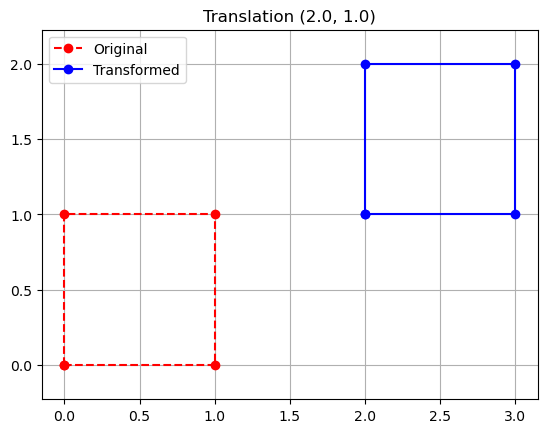

In [49]:
# Translation matrix
def translation(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

# Get input
tx = float(input("Enter translation in X (tx): "))
ty = float(input("Enter translation in Y (ty): "))

# Apply transformation
translated = translation(tx, ty) @ square
plot_transformation(f"Translation ({tx}, {ty})", translated)


<h3>Scaling</h3>

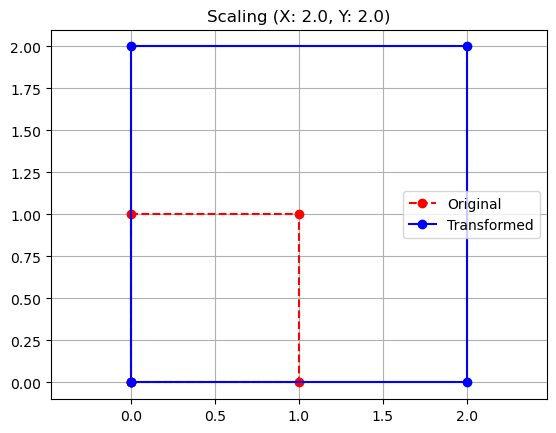

In [51]:
def scaling(sx, sy):
    return np.array([[sx, 0,  0],
                     [0,  sy, 0],
                     [0,  0,  1]])

sx = float(input("Enter scaling factor along X (sx): "))
sy = float(input("Enter scaling factor along Y (sy): "))

scaled = scaling(sx, sy) @ square
plot_transformation(f"Scaling (X: {sx}, Y: {sy})", scaled)


<h3>Rotation</h3>

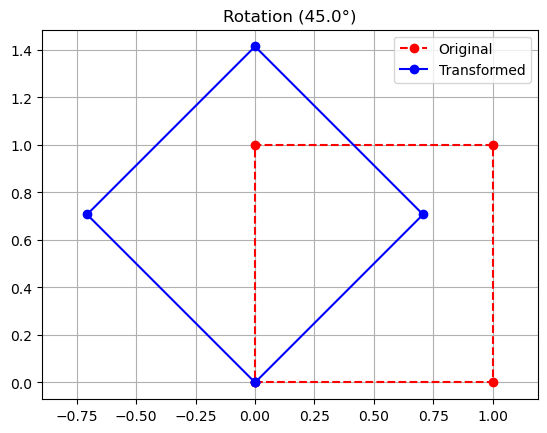

In [54]:
def rotation(theta_degrees):
    theta = np.radians(theta_degrees)
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s, 0],
                     [s,  c, 0],
                     [0,  0, 1]])

angle = float(input("Enter rotation angle (in degrees): "))
rotated = rotation(angle) @ square
plot_transformation(f"Rotation ({angle}°)", rotated)


<h3>Shearing</h3>

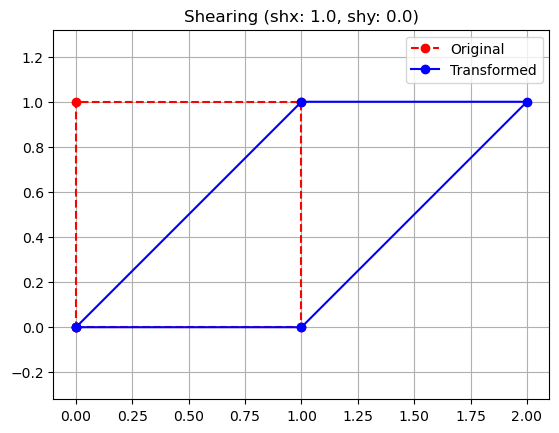

In [56]:
def shearing(shx=0, shy=0):
    return np.array([[1, shx, 0],
                     [shy, 1, 0],
                     [0,   0, 1]])

shx = float(input("Enter shearing in X (shx): "))
shy = float(input("Enter shearing in Y (shy): "))

sheared = shearing(shx, shy) @ square
plot_transformation(f"Shearing (shx: {shx}, shy: {shy})", sheared)


<h3>Reflection</h3>

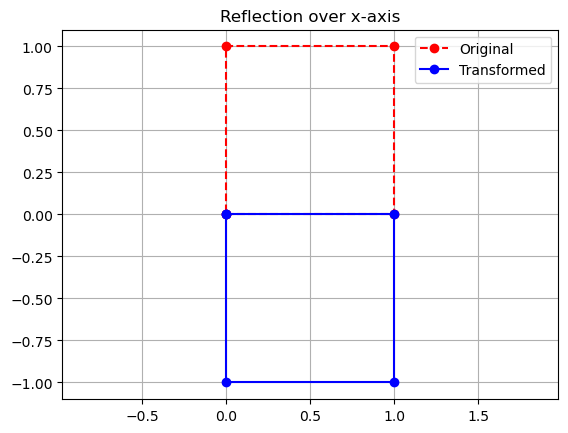

In [55]:
def reflection(axis='x'):
    if axis == 'x':
        return np.array([[1,  0, 0],
                         [0, -1, 0],
                         [0,  0, 1]])
    elif axis == 'y':
        return np.array([[-1, 0, 0],
                         [0,  1, 0],
                         [0,  0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")

axis = input("Enter axis of reflection (x or y): ").lower()
reflected = reflection(axis) @ square
plot_transformation(f"Reflection over {axis}-axis", reflected)


<center><h1>Line Cliping using Cohen-Sutherland</h1></center>

Enter Line 1 coordinates:
Enter Line 2 coordinates:


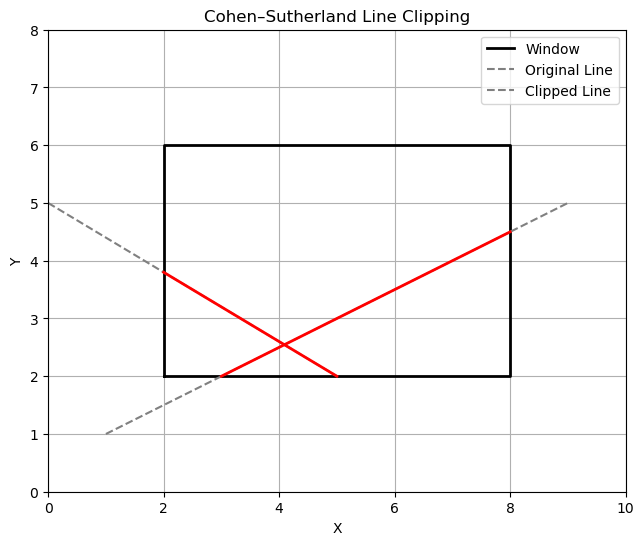

In [25]:
import matplotlib.pyplot as plt

# Region codes
INSIDE = 0
LEFT   = 1
RIGHT  = 2
BOTTOM = 4
TOP    = 8

# Fixed clipping window
x_min, y_min = 2, 2
x_max, y_max = 8, 6

def compute_code(x, y):
    code = INSIDE
    if x < x_min: code |= LEFT
    elif x > x_max: code |= RIGHT
    if y < y_min: code |= BOTTOM
    elif y > y_max: code |= TOP
    return code

def cohen_sutherland_clip(x0, y0, x1, y1):
    code0 = compute_code(x0, y0)
    code1 = compute_code(x1, y1)
    accept = False

    while True:
        if code0 == 0 and code1 == 0:
            accept = True
            break
        elif (code0 & code1) != 0:
            break
        else:
            code_out = code0 if code0 != 0 else code1
            if code_out & TOP:
                x = x0 + (x1 - x0) * (y_max - y0) / (y1 - y0)
                y = y_max
            elif code_out & BOTTOM:
                x = x0 + (x1 - x0) * (y_min - y0) / (y1 - y0)
                y = y_min
            elif code_out & RIGHT:
                y = y0 + (y1 - y0) * (x_max - x0) / (x1 - x0)
                x = x_max
            elif code_out & LEFT:
                y = y0 + (y1 - y0) * (x_min - x0) / (x1 - x0)
                x = x_min

            if code_out == code0:
                x0, y0 = x, y
                code0 = compute_code(x0, y0)
            else:
                x1, y1 = x, y
                code1 = compute_code(x1, y1)

    return (x0, y0, x1, y1) if accept else None

# ✅ Take user input for 2 lines
lines = []
for i in range(2):
    print(f"Enter Line {i+1} coordinates:")
    x0 = float(input("  x0: "))
    y0 = float(input("  y0: "))
    x1 = float(input("  x1: "))
    y1 = float(input("  y1: "))
    lines.append((x0, y0, x1, y1))

# Plot
plt.figure(figsize=(8, 6))
plt.plot([x_min, x_max, x_max, x_min, x_min],
         [y_min, y_min, y_max, y_max, y_min], 'k-', linewidth=2, label='Window')

# Plot original lines (gray dashed)
for x0, y0, x1, y1 in lines:
    plt.plot([x0, x1], [y0, y1], '--', color='gray', label='Original Line')

# Plot clipped lines (red solid)
for x0, y0, x1, y1 in lines:
    clipped = cohen_sutherland_clip(x0, y0, x1, y1)
    if clipped:
        cx0, cy0, cx1, cy1 = clipped
        plt.plot([cx0, cx1], [cy0, cy1], '-', color='red', linewidth=2, label='Clipped Line')

# Display
plt.title("Cohen–Sutherland Line Clipping")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend(["Window", "Original Line", "Clipped Line"])
plt.xlim(0, 10)
plt.ylim(0, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<center><h1>Point-Clipping</h1><center>

Point 1:
Point 2:
Point 3:
Point 4:


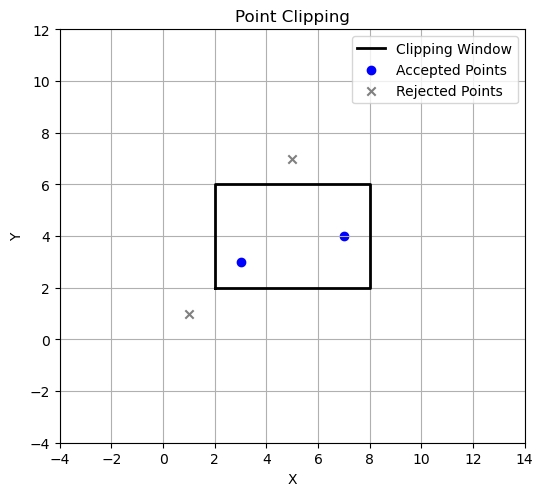

In [34]:
import matplotlib.pyplot as plt

# Get clipping window coordinates from user
xmin = float(input("Enter xmin of window: "))
ymin = float(input("Enter ymin of window: "))
xmax = float(input("Enter xmax of window: "))
ymax = float(input("Enter ymax of window: "))

# Get number of points from user
n = int(input("Enter number of points: "))

points = []
for i in range(n):
    print(f"Point {i+1}:")
    x = float(input("  x: "))
    y = float(input("  y: "))
    points.append((x, y))

# Perform point clipping
clipped_points = []
outside_points = []

for x, y in points:
    if xmin <= x <= xmax and ymin <= y <= ymax:
        clipped_points.append((x, y))
    else:
        outside_points.append((x, y))

# Plotting
plt.figure(figsize=(6, 6))

# Draw clipping window
plt.plot([xmin, xmax, xmax, xmin, xmin],
         [ymin, ymin, ymax, ymax, ymin], 'k-', linewidth=2, label="Clipping Window")

# Plot inside points (blue)
if clipped_points:
    x_in, y_in = zip(*clipped_points)
    plt.scatter(x_in, y_in, c='blue', label='Accepted Points')

# Plot outside points (gray)
if outside_points:
    x_out, y_out = zip(*outside_points)
    plt.scatter(x_out, y_out, c='gray', marker='x', label='Rejected Points')

# Setup plot
plt.title("Point Clipping")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(min(xmin - 5, *[x for x, _ in points]) - 1,
         max(xmax + 5, *[x for x, _ in points]) + 1)
plt.ylim(min(ymin - 5, *[y for _, y in points]) - 1,
         max(ymax + 5, *[y for _, y in points]) + 1)
plt.show()


<center><h1>Bezier Curve from Control Points</h1></center>

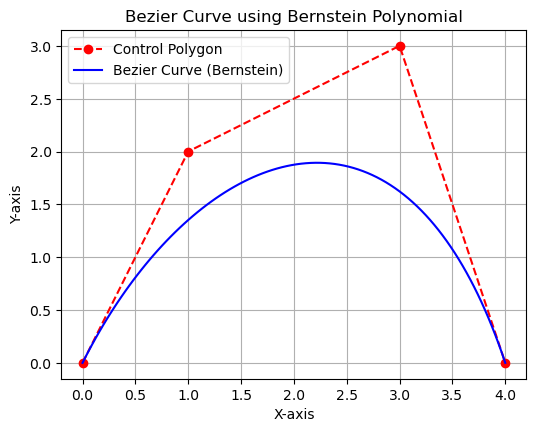

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb  # for binomial coefficient

# Function to compute Bezier curve using Bernstein polynomials
def bernstein_bezier(control_points, num_points=100):
    n = len(control_points) - 1
    t = np.linspace(0, 1, num_points)
    curve = np.zeros((num_points, 2))
    
    for i in range(n + 1):
        binomial = comb(n, i)
        term = (binomial * ((1 - t) ** (n - i)) * (t ** i))[:, None]  # shape: (num_points, 1)
        curve += term * control_points[i]
    
    return curve

# User input
n = int(input("Enter number of control points (at least 2): "))
control_points = []
for i in range(n):
    x = float(input(f"Enter x{i+1}: "))
    y = float(input(f"Enter y{i+1}: "))
    control_points.append([x, y])

control_points = np.array(control_points)
bezier_curve = bernstein_bezier(control_points)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(control_points[:, 0], control_points[:, 1], 'ro--', label='Control Polygon')
plt.plot(bezier_curve[:, 0], bezier_curve[:, 1], 'b-', label='Bezier Curve (Bernstein)')
plt.title("Bezier Curve using Bernstein Polynomial")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


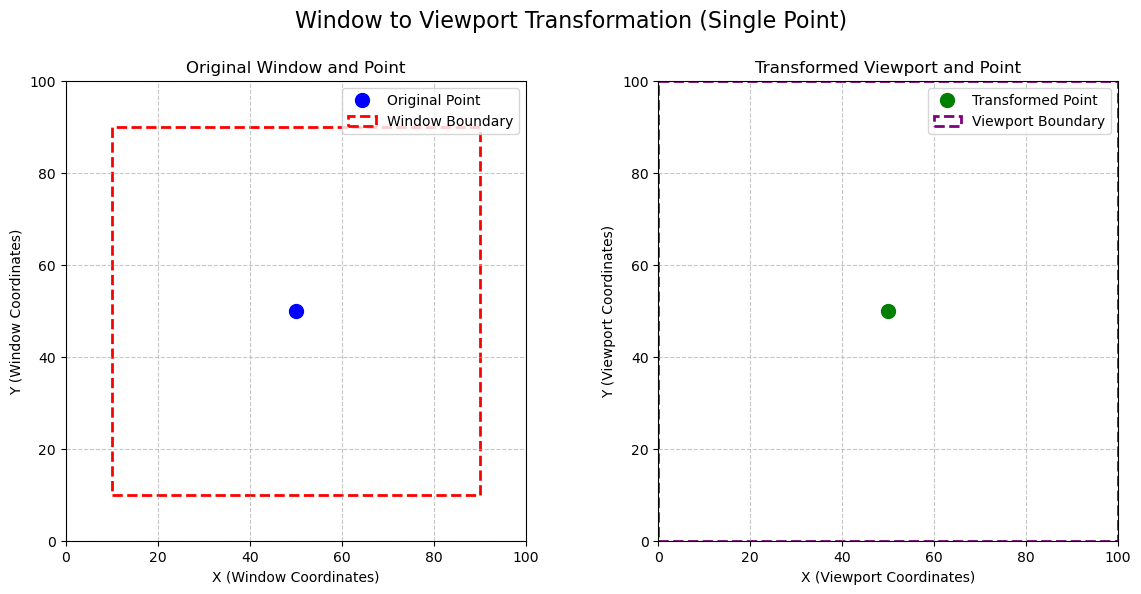

In [3]:
import matplotlib.pyplot as plt

def window_to_viewport(wx, wy, W_xmin, W_ymin, W_xmax, W_ymax, V_xmin, V_ymin, V_xmax, V_ymax):
    
    # Calculate scaling factors for X and Y axes
    sx = (V_xmax - V_xmin) / (W_xmax - W_xmin)
    sy = (V_ymax - V_ymin) / (W_ymax - W_ymin)

    # Calculate transformed X and Y coordinates
    vx = V_xmin + (wx - W_xmin) * sx
    vy = V_ymin + (wy - W_ymin) * sy

    return vx, vy

def main():
    # 1. Define Window and Viewport Coordinates
    # Window (World Coordinates)
    W_xmin, W_ymin = 10, 10
    W_xmax, W_ymax = 90, 90

    # Viewport (Device/Screen Coordinates - relative to subplot)
    V_xmin, V_ymin = 0, 0
    V_xmax, V_ymax = 100, 100

    # 2. Define a single point in window coordinates
    point_window_x, point_window_y = 50, 50 # Center of the window

    # 3. Apply the transformation to the point
    point_viewport_x, point_viewport_y = window_to_viewport(
        point_window_x, point_window_y,
        W_xmin, W_ymin, W_xmax, W_ymax,
        V_xmin, V_ymin, V_xmax, V_ymax
    )

    # 4. Plotting with Matplotlib
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Window to Viewport Transformation (Single Point)', fontsize=16)

    # Plot 1: Original Window and Point
    ax1.plot(point_window_x, point_window_y, 'o', color='blue', markersize=10, label='Original Point')
    ax1.set_title('Original Window and Point')
    ax1.set_xlabel('X (Window Coordinates)')
    ax1.set_ylabel('Y (Window Coordinates)')
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 100)
    ax1.grid(True, linestyle='--', alpha=0.7)
    # Draw the window boundary
    ax1.add_patch(plt.Rectangle((W_xmin, W_ymin), W_xmax - W_xmin, W_ymax - W_ymin,
                                fill=False, edgecolor='red', linewidth=2, linestyle='--', label='Window Boundary'))
    ax1.set_aspect('equal', adjustable='box')
    ax1.legend()

    # Plot 2: Transformed Viewport and Point
    ax2.plot(point_viewport_x, point_viewport_y, 'o', color='green', markersize=10, label='Transformed Point')
    ax2.set_title('Transformed Viewport and Point')
    ax2.set_xlabel('X (Viewport Coordinates)')
    ax2.set_ylabel('Y (Viewport Coordinates)')
    ax2.set_xlim(0, 100)
    ax2.set_ylim(0, 100)
    ax2.grid(True, linestyle='--', alpha=0.7)
    # Draw the viewport boundary
    ax2.add_patch(plt.Rectangle((V_xmin, V_ymin), V_xmax - V_xmin, V_ymax - V_ymin,
                                fill=False, edgecolor='purple', linewidth=2, linestyle='--', label='Viewport Boundary'))
    ax2.set_aspect('equal', adjustable='box')
    ax2.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

if __name__ == "__main__":
    main()
